# Output variable -> y
# y -> Whether the client has subscribed a term deposit or not 
# Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Logistics Regression\bank-full.csv', sep=';', engine='python')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(45211, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [2]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [7]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<Axes: >

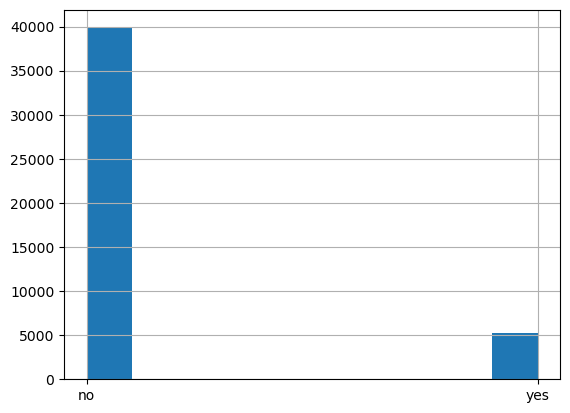

In [18]:
df['y'].hist()

In [8]:
df.groupby('y').mean()

C:\Users\mukes\AppData\Local\Temp\ipykernel_10516\113242886.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('y').mean()


,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read data
df = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\Logistics Regression\bank-full.csv', sep=';', engine='python')


# Implementing the model


In [10]:
# Extract features (X) and target variable (y)
X = df.drop(['y'], axis=1)  # Features
y = df['y']  # Target variable

# Convert 'yes' and 'no' to 1 and 0
y_binary = y.replace({'yes': 1, 'no': 0})

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Logistic Regression Model Fitting

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# fit_transform method is used on the training data (X_train). It calculates the mean and standard deviation of each feature in
# the training set and scales the features based on these statistics
# The same scaler is used to transform the test data (X_test).

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)
#  The \n is an escape sequence representing a newline character, so it adds a line break after the label.



# Assuming you have y_test and y_pred defined
# conf = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix:")
# print(conf)

# The confusion_matrix function from scikit-learn is used to compute the confusion matrix, which is a table that describes the
# performance of a classification model. It compares the predicted labels (y_pred) with the true labels (y_test). 

Accuracy: 0.90
Confusion Matrix:
 [[7755  197]
 [ 719  372]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



# ROC Curve

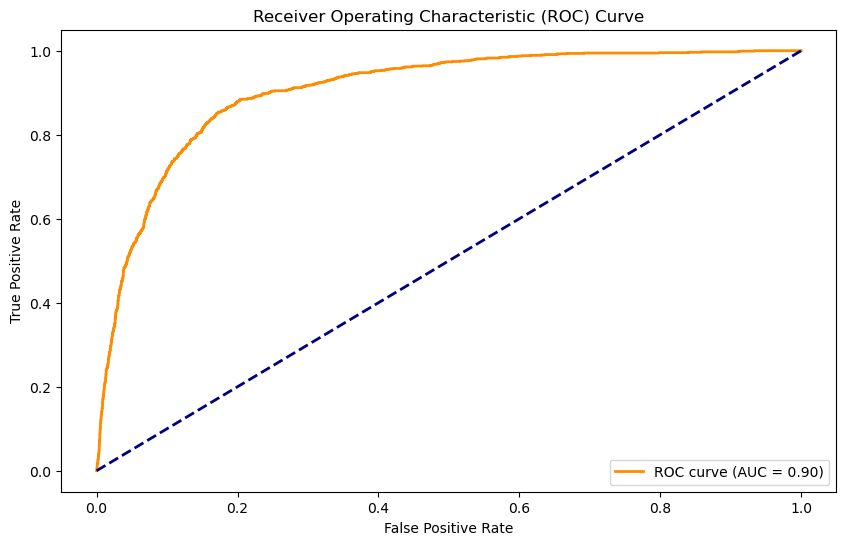

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert 'yes' and 'no' to 1 and 0 using LabelEncoder
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_scaled)[:, 1] 

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
# roc_curve(y_test, y_prob): The roc_curve function from scikit-learn computes the ROC curve by taking the true labels (y_test)
# and the predicted probabilities for the positive class (y_prob). It returns the false positive rates (fpr), true positive
# rates (tpr), and decision thresholds for various points on the ROC curve.

# Plot ROC curve
plt.figure(figsize=(10, 6))    # using Matplotlib to plot the Receiver Operating Characteristic (ROC) curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
# plt.plot: This function is used to create a line plot.
# fpr and tpr: These are the false positive rates and true positive rates, respectively, obtained from the roc_curve function.
# color='darkorange': Sets the color of the line to dark orange.
# lw=2: Specifies the line width.
# label=f'ROC curve (AUC = {roc_auc:.2f})': Adds a label to the line with the AUC value formatted to two decimal places. 

plt.figure(figsize = ())
plt.plot([0,1], [0,1], color = '', lw = , linestyle = '--')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# adding a diagonal dashed line to the Receiver Operating Characteristic (ROC) curve plot.
# plt.plot: This function is used to create a line plot.
# [0, 1], [0, 1]: These are the x and y coordinates of the points to plot. In this case, it represents a diagonal line from the
# bottom-left corner (0, 0) to the top-right corner (1, 1).
# color='navy': Sets the color of the line to navy.
# lw=2: Specifies the line width.
# linestyle='--': Sets the linestyle to a dashed line.
         
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
f  f ffffffff                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         